In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data_Bhaisipati = pd.read_csv('.\\Data\\Bhaisipati.csv')

In [58]:
data_Bhaisipati.isna().sum(axis=0)

_id                   0
station               0
particulate_matter    0
datetime              0
value                 8
dtype: int64

In [68]:
data= data_Bhaisipati.pivot_table('value',['datetime'],'particulate_matter',aggfunc='mean')


In [69]:
display(data)

particulate_matter,PM1,PM10,PM2.5,TSP
datetime,,,,
2018-12-31T19:12:48,32.10,NaN,NaN,NaN
2018-12-31T19:22:48,31.30,NaN,NaN,NaN
2018-12-31T19:42:48,35.30,NaN,NaN,NaN
2018-12-31T20:22:48,26.10,NaN,NaN,NaN
2018-12-31T21:12:48,29.50,NaN,NaN,NaN
...,...,...,...,...
2021-04-01T09:57:58,NaN,NaN,49.7,NaN
2021-04-01T10:51:37,47.29,NaN,NaN,NaN
2021-04-01T10:51:38,NaN,NaN,NaN,1258.4


In [74]:
data.to_csv('.\\Data\\bhaisepati_sorted.csv')

In [75]:
data_Bhaisipati_sorted = pd.read_csv('.\\Data\\bhaisepati_sorted.csv')

In [76]:
display(data_Bhaisipati_sorted)

,datetime,PM1,PM10,PM2.5,TSP
0,2018-12-31T19:12:48,32.10,NaN,NaN,NaN
1,2018-12-31T19:22:48,31.30,NaN,NaN,NaN
2,2018-12-31T19:42:48,35.30,NaN,NaN,NaN
3,2018-12-31T20:22:48,26.10,NaN,NaN,NaN
4,2018-12-31T21:12:48,29.50,NaN,NaN,NaN
...,...,...,...,...,...
132585,2021-04-01T09:57:58,NaN,NaN,49.7,NaN
132586,2021-04-01T10:51:37,47.29,NaN,NaN,NaN
132587,2021-04-01T10:51:38,NaN,NaN,NaN,1258.4
132588,2021-04-01T10:51:42,NaN,228.1,NaN,NaN


In [77]:
date_info =pd.to_datetime(data_Bhaisipati_sorted['datetime'])

In [78]:
data_Bhaisipati_sorted['datetime']=date_info

In [79]:
display(data_Bhaisipati_sorted)

,datetime,PM1,PM10,PM2.5,TSP
0,2018-12-31 19:12:48,32.10,NaN,NaN,NaN
1,2018-12-31 19:22:48,31.30,NaN,NaN,NaN
2,2018-12-31 19:42:48,35.30,NaN,NaN,NaN
3,2018-12-31 20:22:48,26.10,NaN,NaN,NaN
4,2018-12-31 21:12:48,29.50,NaN,NaN,NaN
...,...,...,...,...,...
132585,2021-04-01 09:57:58,NaN,NaN,49.7,NaN
132586,2021-04-01 10:51:37,47.29,NaN,NaN,NaN
132587,2021-04-01 10:51:38,NaN,NaN,NaN,1258.4
132588,2021-04-01 10:51:42,NaN,228.1,NaN,NaN


<Axes: xlabel='datetime'>

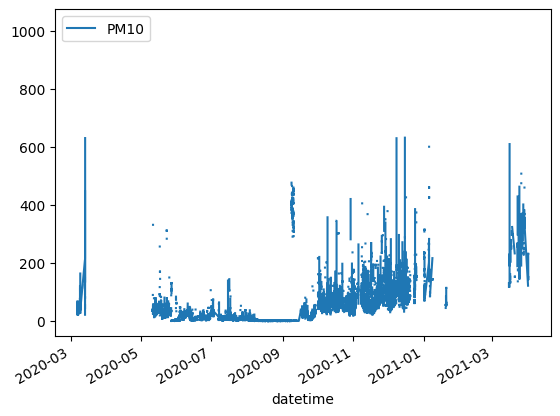

In [86]:
data_Bhaisipati_sorted.plot(x='datetime',y='PM10')

In [84]:
from prophet import Prophet

In [88]:
import statistics

In [91]:

data_Bhaisipati_sorted['PM2.55'] = data_Bhaisipati_sorted[['PM1', 'PM2.5']].mean(axis=1)


In [92]:
display(data_Bhaisipati_sorted)

,datetime,PM1,PM10,PM2.5,TSP,PM2.55
0,2018-12-31 19:12:48,32.10,NaN,NaN,NaN,32.10
1,2018-12-31 19:22:48,31.30,NaN,NaN,NaN,31.30
2,2018-12-31 19:42:48,35.30,NaN,NaN,NaN,35.30
3,2018-12-31 20:22:48,26.10,NaN,NaN,NaN,26.10
4,2018-12-31 21:12:48,29.50,NaN,NaN,NaN,29.50
...,...,...,...,...,...,...
132585,2021-04-01 09:57:58,NaN,NaN,49.7,NaN,49.70
132586,2021-04-01 10:51:37,47.29,NaN,NaN,NaN,47.29
132587,2021-04-01 10:51:38,NaN,NaN,NaN,1258.4,NaN
132588,2021-04-01 10:51:42,NaN,228.1,NaN,NaN,NaN


In [97]:
data_Bhaisipati_sorted = data_Bhaisipati_sorted.drop(data_Bhaisipati_sorted[data_Bhaisipati_sorted.PM1.isna()].index)

In [98]:
display(data_Bhaisipati_sorted)

,datetime,PM1,PM10,PM2.5,TSP,PM2.55
0,2018-12-31 19:12:48,32.10,NaN,NaN,NaN,32.10
1,2018-12-31 19:22:48,31.30,NaN,NaN,NaN,31.30
2,2018-12-31 19:42:48,35.30,NaN,NaN,NaN,35.30
3,2018-12-31 20:22:48,26.10,NaN,NaN,NaN,26.10
4,2018-12-31 21:12:48,29.50,NaN,NaN,NaN,29.50
...,...,...,...,...,...,...
132579,2021-04-01 09:57:46,40.59,151.6,NaN,1298.8,40.59
132580,2021-04-01 09:57:47,40.59,NaN,NaN,NaN,40.59
132582,2021-04-01 09:57:51,40.59,151.6,NaN,1298.8,40.59
132583,2021-04-01 09:57:52,40.59,NaN,NaN,NaN,40.59


<Axes: xlabel='datetime'>

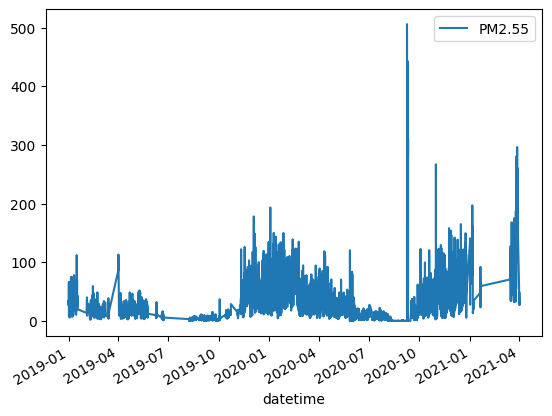

In [99]:
data_Bhaisipati_sorted.plot(x='datetime',y='PM2.55')

In [100]:
model = Prophet()

train_data=pd.DataFrame()
train_data['ds']=data_Bhaisipati_sorted['datetime']
train_data['y']=data_Bhaisipati_sorted['PM2.55']

In [101]:
model.fit(train_data)

13:29:05 - cmdstanpy - INFO - Chain [1] start processing
13:31:19 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
future=model.make_future_dataframe(periods=3650)
future.tail()

,ds
56672,2031-03-26 10:51:37
56673,2031-03-27 10:51:37
56674,2031-03-28 10:51:37
56675,2031-03-29 10:51:37
56676,2031-03-30 10:51:37


In [104]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
56672,2031-03-26 10:51:37,2285.498120,-117083.555053,109523.904605,-117117.846669,109491.154779,3.222603,3.222603,3.222603,-6.673703,...,9.431575,9.431575,9.431575,0.464731,0.464731,0.464731,0.0,0.0,0.0,2288.720724
56673,2031-03-27 10:51:37,2286.091114,-117209.856192,109529.750448,-117203.094592,109550.131602,-6.173211,-6.173211,-6.173211,-6.673703,...,-1.663374,-1.663374,-1.663374,2.163867,2.163867,2.163867,0.0,0.0,0.0,2279.917903
56674,2031-03-28 10:51:37,2286.684107,-117259.649239,109581.474248,-117288.342515,109609.108425,-8.120200,-8.120200,-8.120200,-6.673703,...,-5.234405,-5.234405,-5.234405,3.787908,3.787908,3.787908,0.0,0.0,0.0,2278.563908
56675,2031-03-29 10:51:37,2287.277101,-117399.775074,109667.835657,-117373.590439,109668.085248,-3.859710,-3.859710,-3.859710,-6.673703,...,-2.502170,-2.502170,-2.502170,5.316164,5.316164,5.316164,0.0,0.0,0.0,2283.417391
56676,2031-03-30 10:51:37,2287.870095,-117424.705017,109662.056178,-117458.838362,109727.062071,-2.662422,-2.662422,-2.662422,-6.673703,...,-2.719095,-2.719095,-2.719095,6.730376,6.730376,6.730376,0.0,0.0,0.0,2285.207673


c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

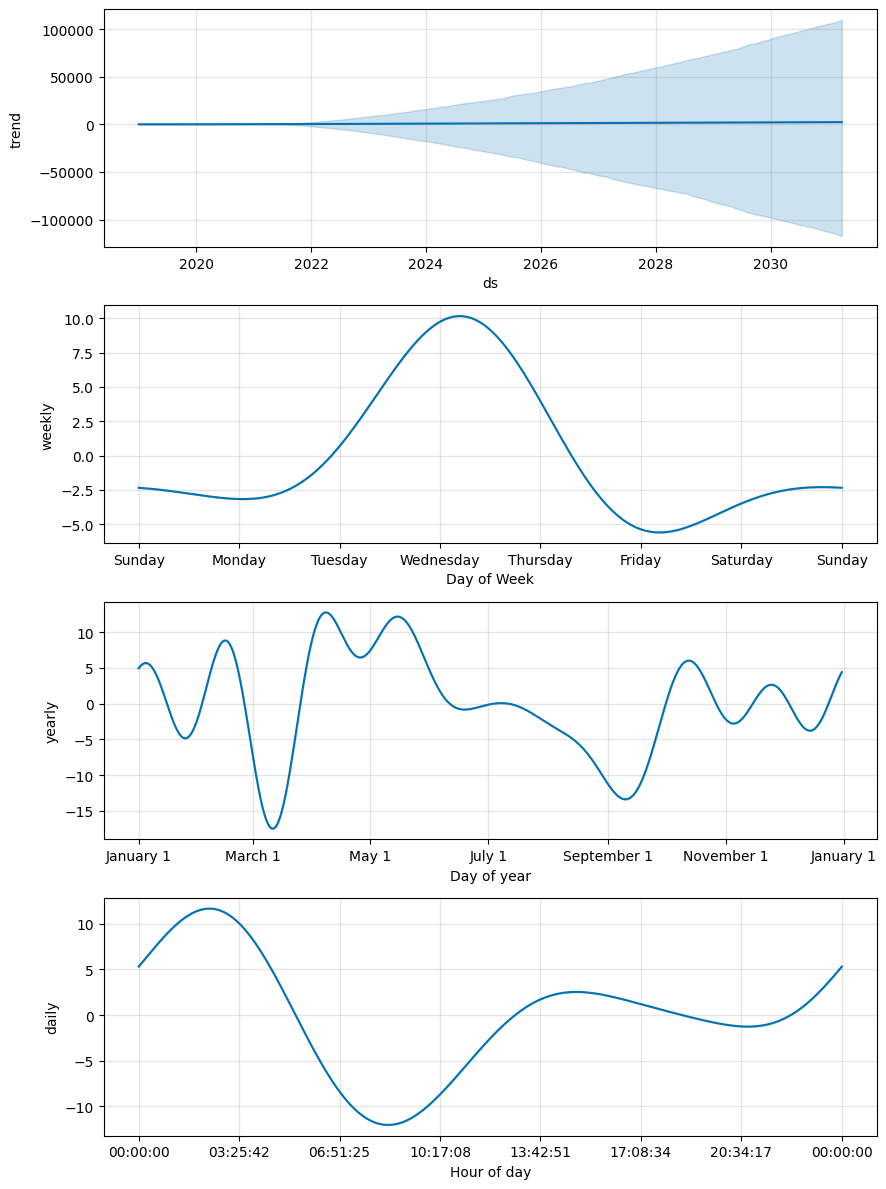

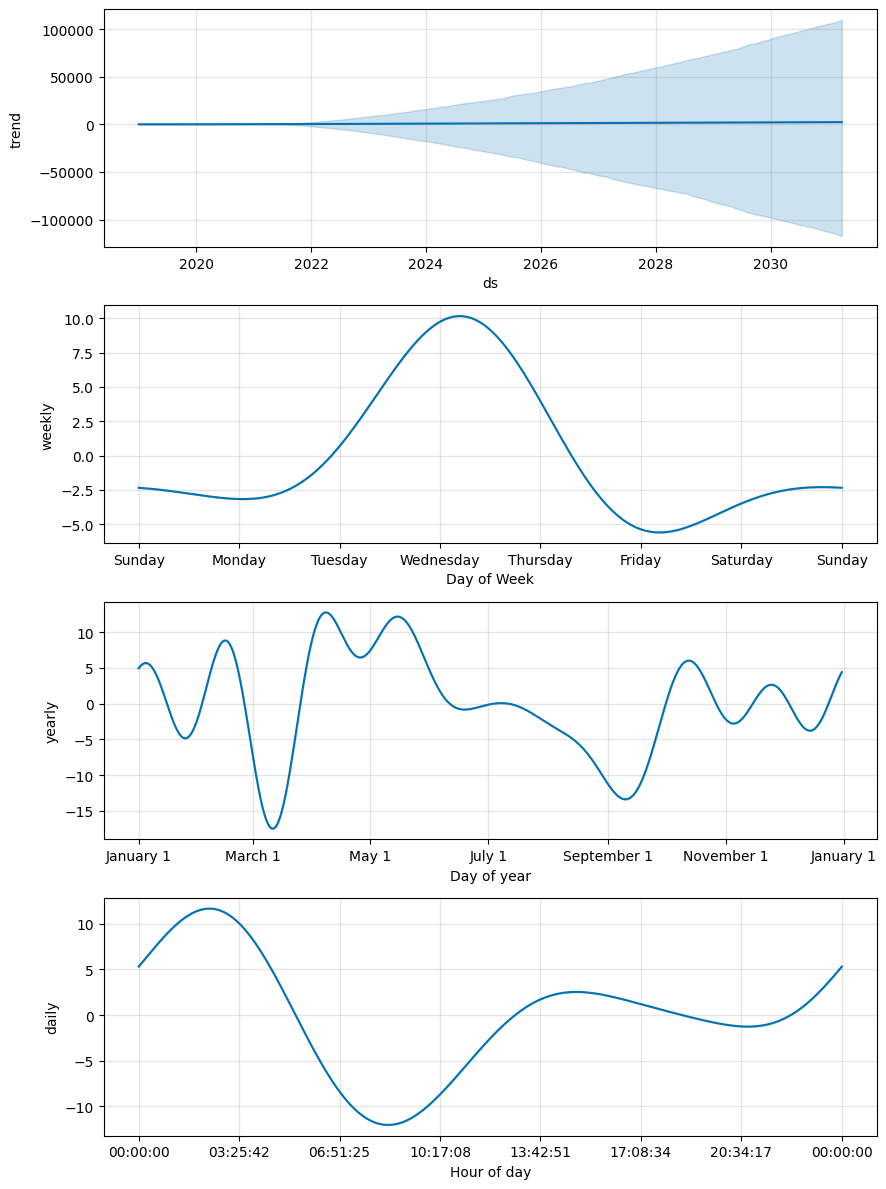

In [105]:
model.plot_components(forecast)